In [1]:
import sys
sys.path.append("../")

from src.models.ViT_Model import create_model
import torch
from PIL import Image
import numpy as np

device = torch.device("cuda:0")

# Load some example images

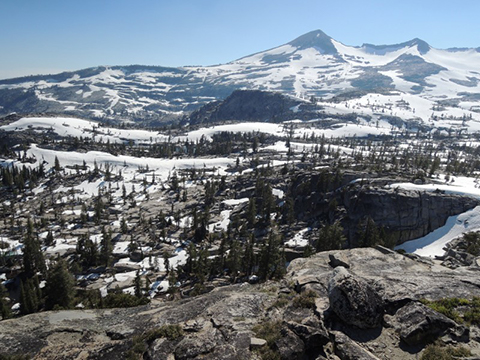

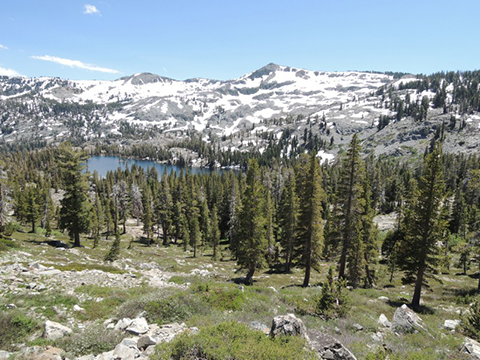

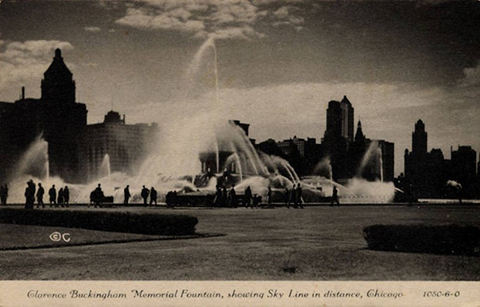

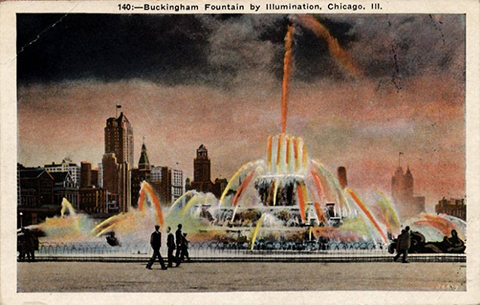

In [4]:
img1 = Image.open("../images/example/0_e8b9b9a19ebf6a0d.jpg")
img2 = Image.open("../images/example/0_ff075584fa3ac3fe.jpg")
img3 = Image.open("../images/example/1_02b09bb030cf5687.jpg")
img4 = Image.open("../images/example/1_069bd3186f7c6be8.jpg")
images = [img1, img2, img3, img4]

display(img1, img2, img3, img4)

# Load the Neural Network "ViT-B" or "ViT-L"

In [6]:
check_pth = "/path/to/downloaded/GPNNS_ViTB.pth"
model, transform_fn = create_model(model_name = "ViT-B", check_pth=check_pth) 
model.to(device)
model.eval();

# Scale the images and store them on the device

In [7]:
prepared_image_list = []
for img in images:
    prepared_image_list.append(transform_fn(img).half().to(device))
prepared_images = torch.stack(prepared_image_list)
print(prepared_images.shape)

torch.Size([4, 3, 224, 224])


# Compute the features for the images and copy them to the CPU

In [8]:
out = model(prepared_images)
fv = out.cpu().detach().numpy()
print(fv.shape)
fv

(4, 768)


array([[-2.917e-01,  3.547e-01,  8.184e-01, ..., -1.249e+00,  1.109e+00,
        -1.238e+00],
       [ 9.341e-01,  5.688e-01, -6.738e-01, ..., -3.904e-01,  3.337e-01,
         4.556e-04],
       [ 4.082e-01,  8.062e-01,  2.346e-01, ..., -2.432e+00,  2.155e-01,
        -9.624e-01],
       [ 6.671e-02,  8.091e-01, -3.250e-01, ..., -1.950e+00, -4.407e-01,
         1.902e-01]], dtype=float16)

# Optional compute the binary feature

In [22]:
# binary embeddings
bv = np.int8(fv > 0)
print(bv.shape)
bv

(4, 768)


array([[0, 1, 1, ..., 0, 1, 0],
       [1, 1, 0, ..., 0, 1, 1],
       [1, 1, 1, ..., 0, 1, 0],
       [1, 1, 0, ..., 0, 0, 1]], dtype=int8)

# Use image 1 as a query

In [33]:
query = fv[3]
for i in range(fv.shape[0]):
    dist = np.linalg.norm(query-fv[i])
    print("distance to image", i, "is", dist)

distance to image 0 is 35.16
distance to image 1 is 35.53
distance to image 2 is 23.23
distance to image 3 is 0.0


# Repeat the search with the binary features

In [34]:
query = bv[3]
dists = []
for i in range(bv.shape[0]):
    dist = np.count_nonzero(query != bv[i])
    print("distance to image", i, "is", dist)
    dists.append(dist)

distance to image 0 is 364
distance to image 1 is 376
distance to image 2 is 235
distance to image 3 is 0


# Sort images based on distance

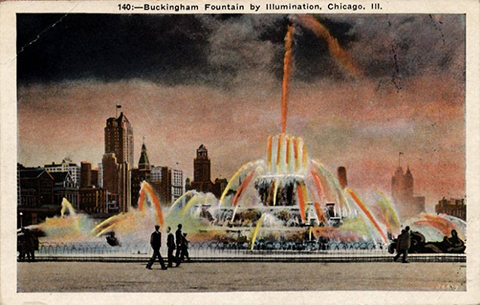

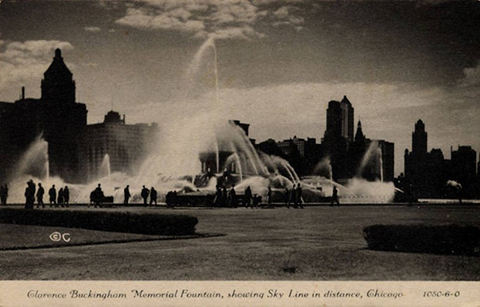

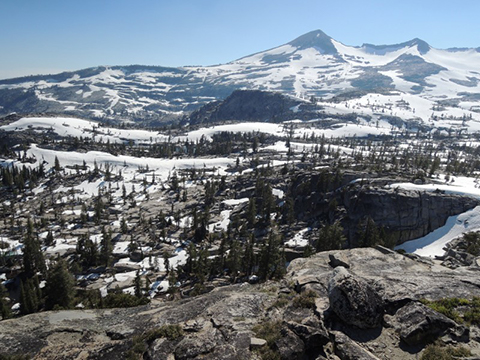

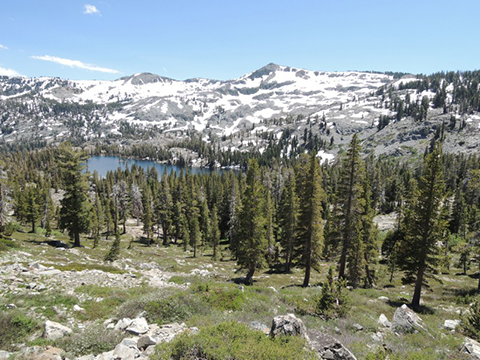

In [35]:
sorted_images = [image for _, image in sorted(zip(dists, images))]
for img in sorted_images:
    display(img)